#### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from wordcloud import WordCloud

#### Load dataset

In [2]:
reviews_data = pd.read_csv("data/cleaned_reviews_lemmatized_data.csv")

#### Inspect first 5 rows and data types of the dataset

In [3]:
reviews_data.head()

Review  Liked  \
0                           Wow... Loved this place.      1   
1                                 Crust is not good.      0   
2          Not tasty and the texture was just nasty.      0   
3  Stopped by during the late May bank holiday of...      1   
4  The selection on the menu was great and so wer...      1   

                          reviews_cleaned_lemmatized  \
0                                 wow ... love place   
1                                         crust good   
2                                tasty texture nasty   
3  stop late may bank holiday rick steve recommen...   
4                         selection menu great price   

                                     reviews_cleaned  
0                           wow ... loved this place  
1                                  crust is not good  
2           not tasty and the texture was just nasty  
3  stopped by during the late may bank holiday of...  
4  the selection on the menu was great and so wer...

In [4]:
reviews_data.shape

(899, 4)

In [5]:
reviews_data = reviews_data.dropna()

#### Perform TF-IDF

In [6]:
tfIdfVectorizer=TfidfVectorizer(use_idf = True)
tfIdf = tfIdfVectorizer.fit_transform(reviews_data['reviews_cleaned_lemmatized'])
tfIdf_output = pd.DataFrame(tfIdf.toarray(),columns=tfIdfVectorizer.get_feature_names())
tfIdf_output.head(10)

00   10  100   12   15   17  1979   20  2007   23  ...  year  yellow  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  ...   0.0     0.0   

   yellowtail  yelpers  yet  yucky  yukon  yum  yummy  zero  
0         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
1         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
2         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
3         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
4         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
5         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
6         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
7         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
8         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  
9         0.0      0.0  0.0    0.0    0.0  0.0    0.0   0.0  

[10 rows x 1565 columns]

In [7]:
tfIdf_total = tfIdf_output.T.sum(axis=1)
tfIdf_total.sort_values(ascending = False)

food           30.857469
good           29.941739
place          27.339000
service        27.164228
great          23.934017
                 ...    
deep            0.252433
gloves          0.252433
temp            0.252433
eel             0.210356
description     0.210356
Length: 1565, dtype: float64

#### Visualise word clouds using TF-IDF

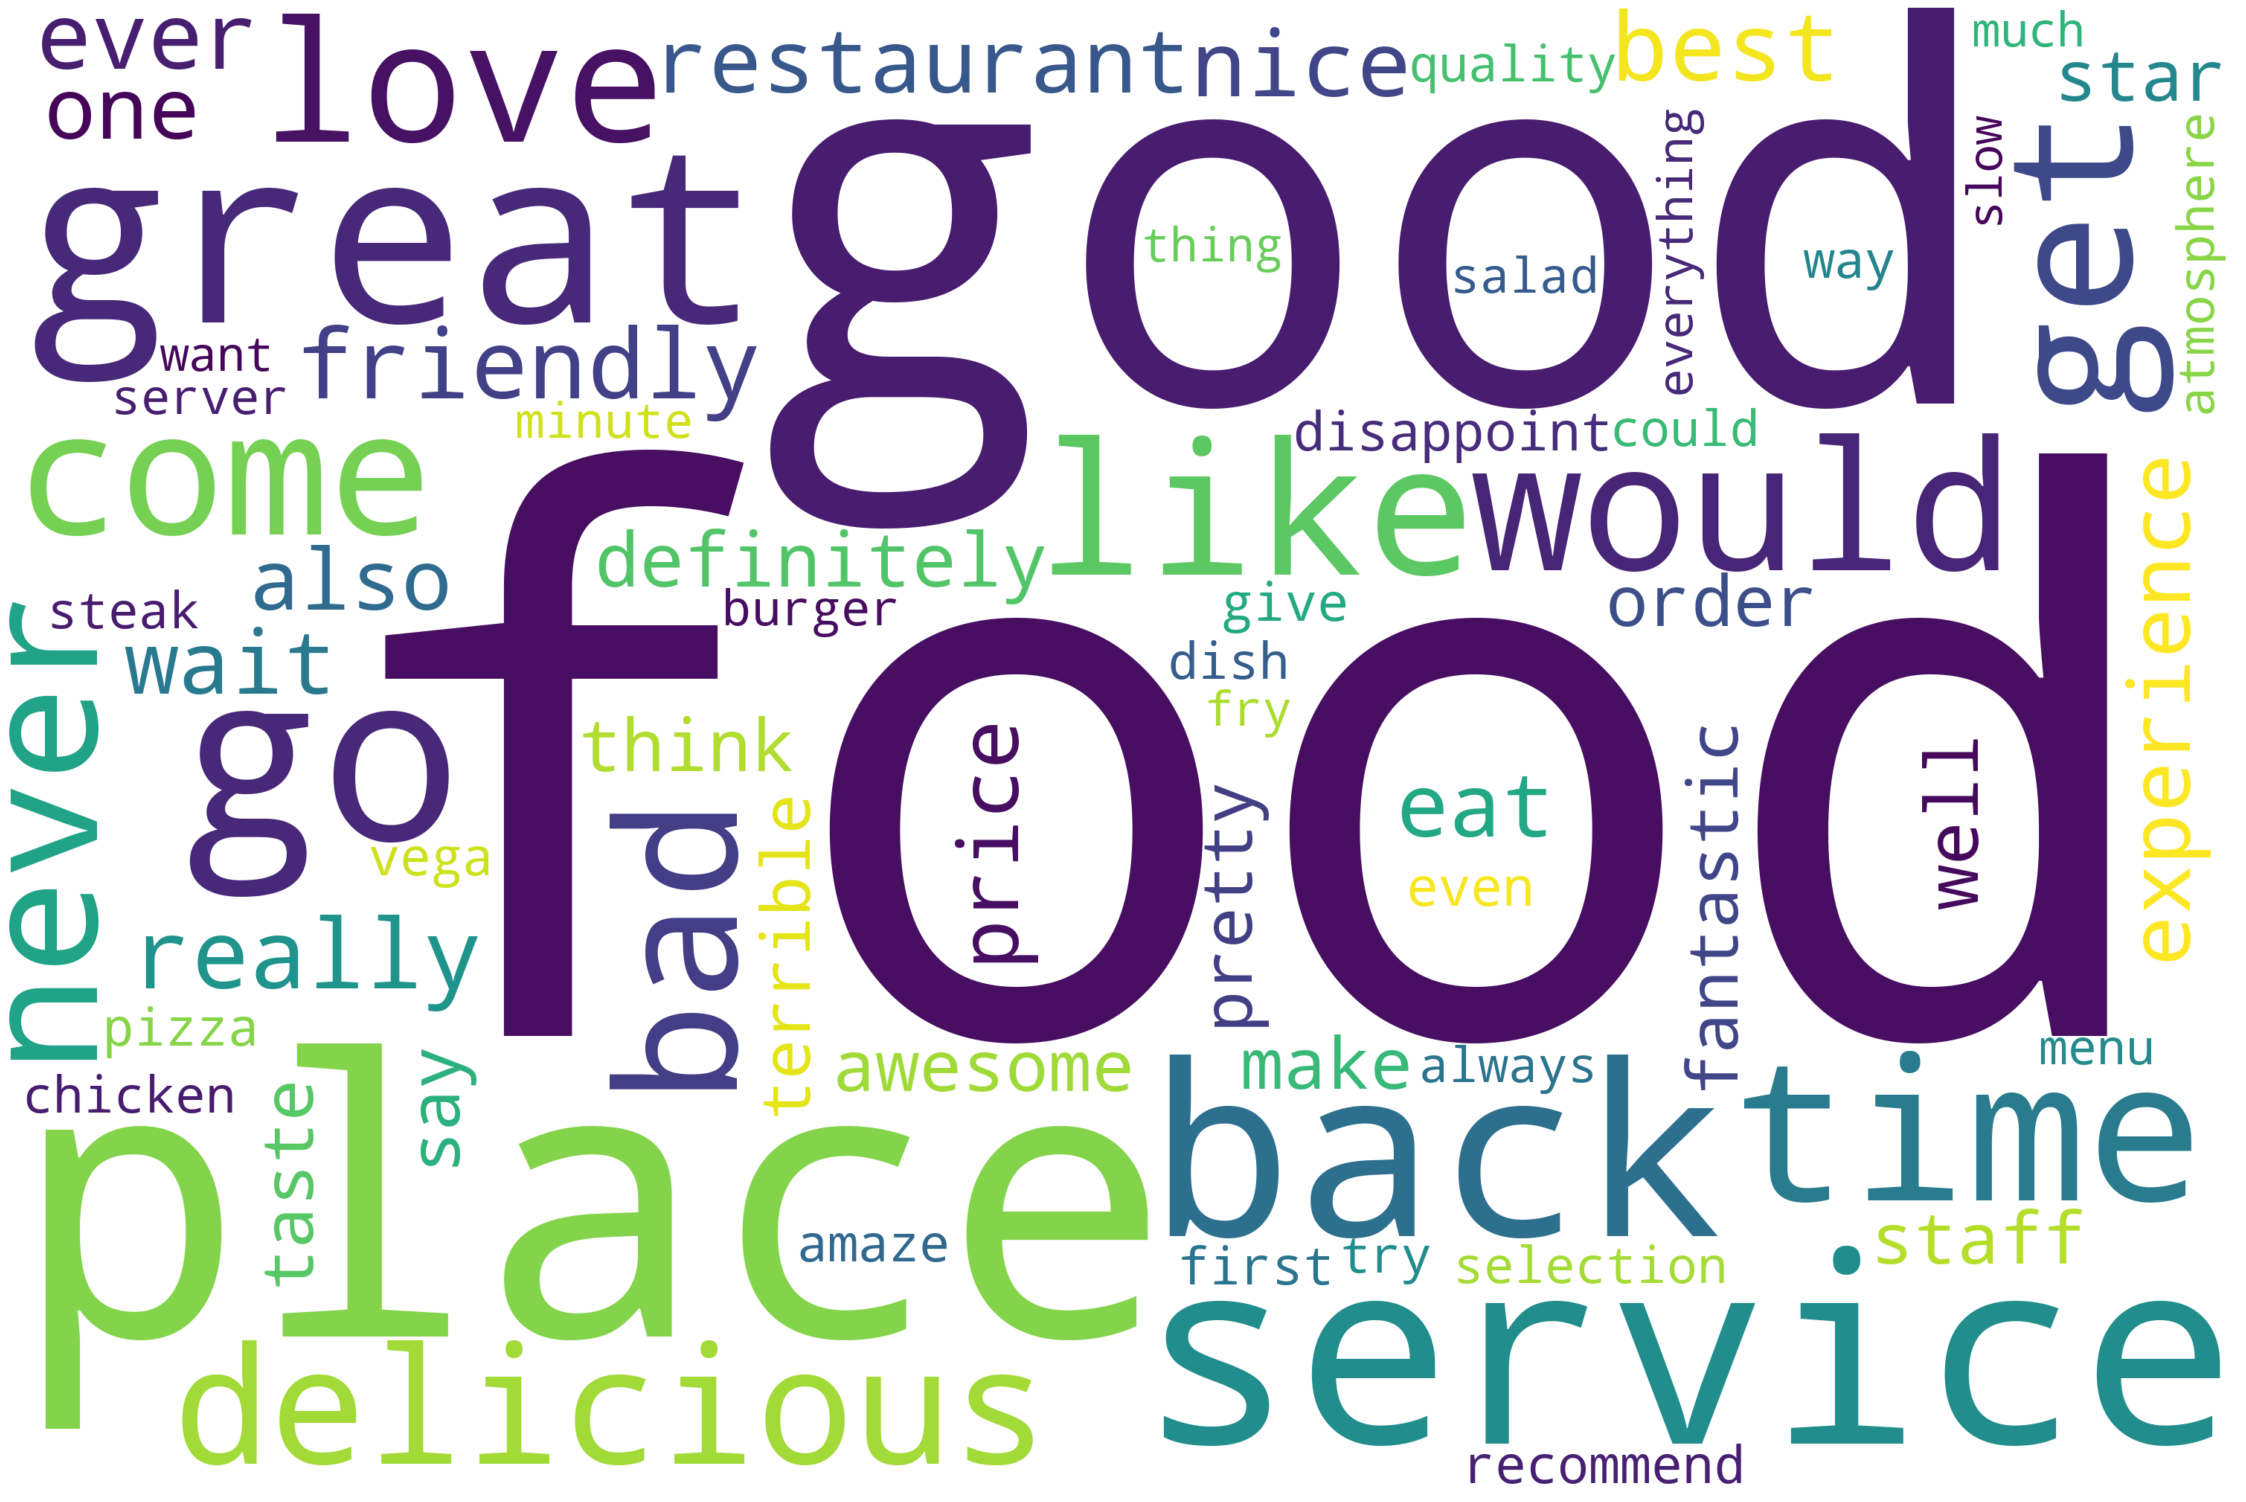

In [8]:
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',max_words=70)
wordcloud.generate_from_frequencies(tfIdf_total)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()